In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def is_safe_canonical(board, row, col):
    for prev_row in range(row):
        if board[prev_row] == col or abs(board[prev_row] - col) == abs(prev_row - row):
            return False
    return True

In [3]:
def backtrack_canonical(n, row, board, solutions):
    if row == n:
        solutions.append(board[:])
        return
    for col in range(n):
        if is_safe_canonical(board, row, col):
            board[row] = col
            backtrack_canonical(n, row + 1, board, solutions)
            board[row] = -1  # backtrack

In [4]:
def solve_n_queens_canonical(n):
    solutions = []
    board = [-1] * n
    backtrack_canonical(n, 0, board, solutions)
    return solutions

In [9]:
# Función optimizada de seguridad para el algoritmo de backtracking
def is_safe_optimized(row, col, cols, diag1, diag2, n):
    return not cols[col] and not diag1[row + col] and not diag2[row - col + n - 1]


In [10]:
# Función de backtracking optimizado para N-reinas
def backtrack_optimized(row, path, cols, diag1, diag2, solutions, n):
    if row == n:
        solutions.append(path[:])
        return
    for col in range(n):
        if is_safe_optimized(row, col, cols, diag1, diag2, n):
            cols[col] = diag1[row + col] = diag2[row - col + n - 1] = True
            path.append(col)
            backtrack_optimized(row + 1, path, cols, diag1, diag2, solutions, n)
            path.pop()
            cols[col] = diag1[row + col] = diag2[row - col + n - 1] = False


In [11]:
# Función para resolver el problema de N-reinas con backtracking optimizado
def solve_n_queens_optimized(n):
    solutions = []
    cols = [False] * n
    diag1 = [False] * (2 * n - 1)
    diag2 = [False] * (2 * n - 1)
    backtrack_optimized(0, [], cols, diag1, diag2, solutions, n)
    return solutions


In [37]:
n_values = range(4, 14)
canonical_times = []
optimized_times = []
repetitions = 10  # Número de repeticiones por valor de n

for n in n_values:
    # Medir tiempo promedio del método canónico
    total_time_canonical = 0
    for _ in range(repetitions):
        start_time = time.time()
        solve_n_queens_canonical(n)
        total_time_canonical += time.time() - start_time
    canonical_times.append(total_time_canonical / repetitions)
    
    # Medir tiempo promedio del método optimizado
    total_time_optimized = 0
    for _ in range(repetitions):
        start_time = time.time()
        solve_n_queens_optimized(n)
        total_time_optimized += time.time() - start_time
    optimized_times.append(total_time_optimized / repetitions)

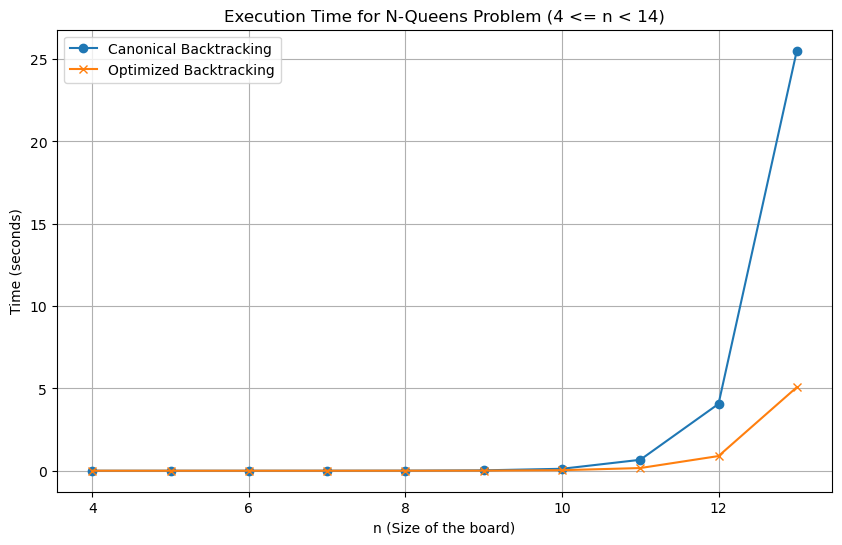

In [39]:
# Graficar los tiempos
plt.figure(figsize=(10, 6))
plt.plot(n_values, canonical_times, label="Canonical Backtracking", marker='o')
plt.plot(n_values, optimized_times, label="Optimized Backtracking", marker='x')
plt.xlabel('n (Size of the board)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for N-Queens Problem (4 <= n < 14)')
plt.legend()
plt.grid(True)
plt.show()

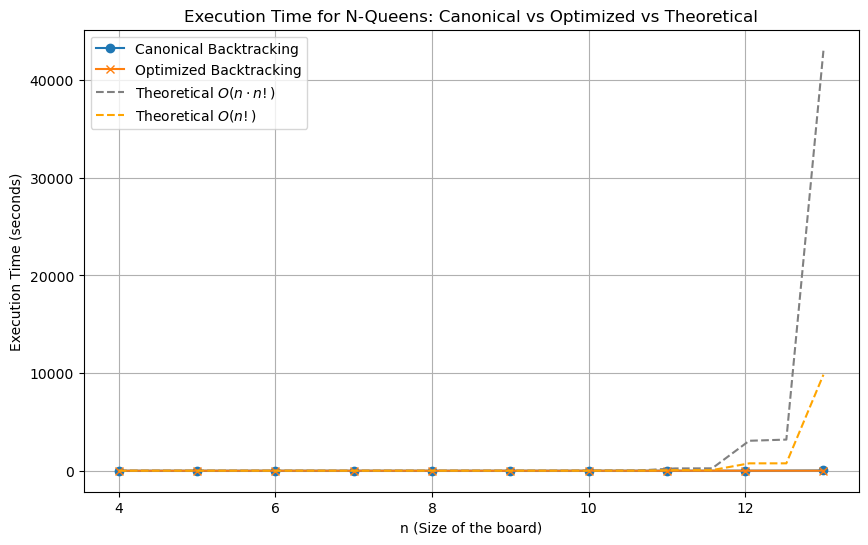

In [34]:
import math

n_values_np = np.array(n_values)
canonical_times_np = np.array(canonical_times)
optimized_times_np = np.array(optimized_times)

# Crear puntos más suaves entre los valores de n
smooth_n = np.linspace(n_values_np.min(), n_values_np.max(), 20)

# Evaluar las curvas teóricas (suavizadas)
factorial_n = np.array([math.factorial(int(n)) for n in smooth_n])
n_factorial_n = smooth_n * factorial_n

# Escalamos para compararlas visualmente (al primer valor real)
theoretical_canonical = n_factorial_n / n_factorial_n[0] * canonical_times_np[0]
theoretical_optimized = factorial_n / factorial_n[0] * optimized_times_np[0]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(n_values_np, canonical_times_np, marker='o', label="Canonical Backtracking")
plt.plot(n_values_np, optimized_times_np, marker='x', label="Optimized Backtracking")
plt.plot(smooth_n, theoretical_canonical, '--', color='gray', label=r"Theoretical $O(n \cdot n!)$")
plt.plot(smooth_n, theoretical_optimized, '--', color='orange', label=r"Theoretical $O(n!)$")

plt.xlabel('n (Size of the board)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time for N-Queens: Canonical vs Optimized vs Theoretical')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'python3' is not defined